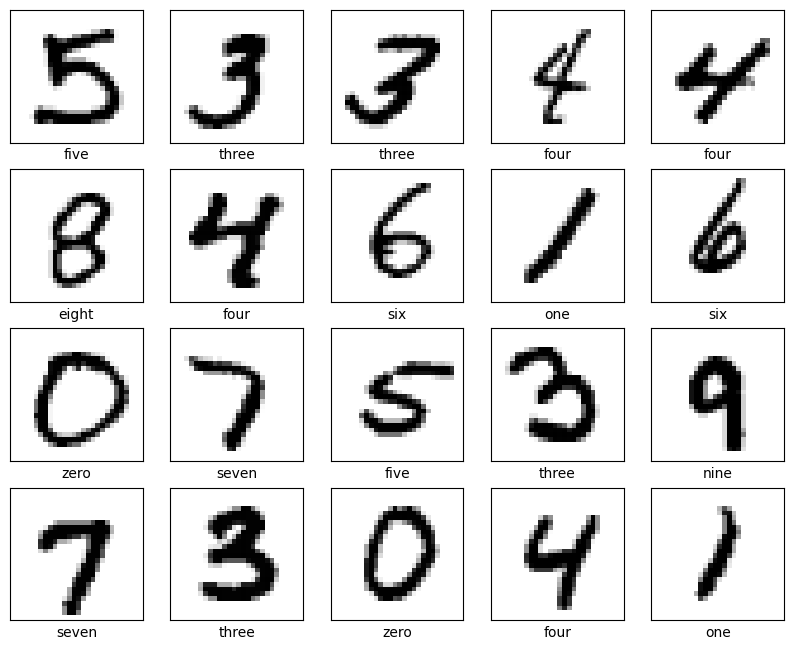

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#from sklearn.metrics import classification_report

# First loading 2 common datasets (MNIST and CIFAR-10)
mnist = tf.keras.datasets.mnist.load_data()
cifar10 = tf.keras.datasets.cifar10.load_data()

# Then preprocessing for each dataset
mnist_x_train, mnist_y_train = mnist[0]
mnist_x_test, mnist_y_test = mnist[1]
mnist_x_train, mnist_x_test = mnist_x_train / 255.0, mnist_x_test / 255.0

cifar10_x_train, cifar10_y_train = cifar10[0]
cifar10_x_test, cifar10_y_test = cifar10[1]
cifar10_x_train, cifar10_x_test = cifar10_x_train / 255.0, cifar10_x_test / 255.0

# Splitting MNIST dataset into train and test sets
mnist_x_train, mnist_x_test, mnist_y_train, mnist_y_test = train_test_split(
    mnist_x_train, mnist_y_train, train_size=0.9, test_size=0.1
)

# Splitting CIFAR-10 dataset into train and test sets
cifar10_x_train, cifar10_x_test, cifar10_y_train, cifar10_y_test = train_test_split(
    cifar10_x_train, cifar10_y_train, train_size=0.9, test_size=0.1
)
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']


plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist_x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[mnist_y_train[i]])
plt.show()

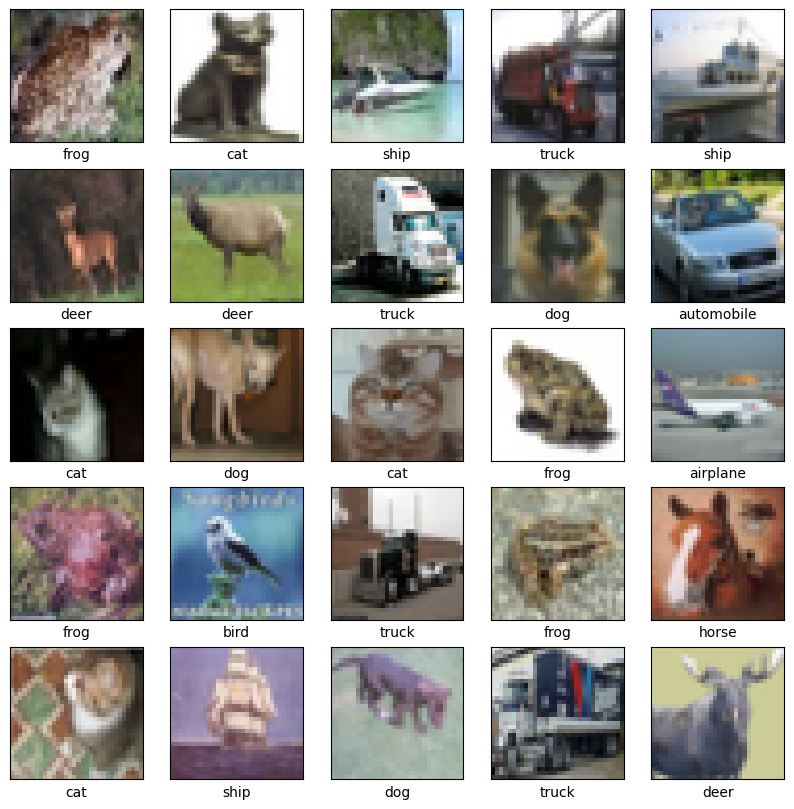

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar10_x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[cifar10_y_train[i][0]])
plt.show()

In [4]:
# Build the LeNet-5 for Classification
def lenet5_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

mnist_model = lenet5_model((28, 28, 1), 10)
cifar10_model = lenet5_model((32, 32, 3), 10)

mnist_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cifar10_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
mnist_model.fit(mnist_x_train, mnist_y_train, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 34s 19ms/step - loss: 0.2045 - accuracy: 0.9384
Epoch 2/10
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0715 - accuracy: 0.9776
Epoch 3/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0505 - accuracy: 0.9843
Epoch 4/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0403 - accuracy: 0.9868
Epoch 5/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0321 - accuracy: 0.9892
Epoch 6/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0269 - accuracy: 0.9917
Epoch 7/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0228 - accuracy: 0.9925
Epoch 8/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0179 - accuracy: 0.9939
Epoch 9/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 10/10
1688/1688 [==============================] - 29s 17m

In [3]:
cifar10_model.fit(cifar10_x_train, cifar10_y_train, epochs=10)

Epoch 1/10
1407/1407 [==============================] - 46s 32ms/step - loss: 1.6382 - accuracy: 0.3974
Epoch 2/10
1407/1407 [==============================] - 36s 25ms/step - loss: 1.3539 - accuracy: 0.5144
Epoch 3/10
1407/1407 [==============================] - 37s 26ms/step - loss: 1.2403 - accuracy: 0.5604
Epoch 4/10
1407/1407 [==============================] - 39s 27ms/step - loss: 1.1620 - accuracy: 0.5882
Epoch 5/10
1407/1407 [==============================] - 38s 27ms/step - loss: 1.0962 - accuracy: 0.6123
Epoch 6/10
1407/1407 [==============================] - 38s 27ms/step - loss: 1.0509 - accuracy: 0.6277
Epoch 7/10
1407/1407 [==============================] - 38s 27ms/step - loss: 1.0029 - accuracy: 0.6447
Epoch 8/10
1407/1407 [==============================] - 38s 27ms/step - loss: 0.9606 - accuracy: 0.6588
Epoch 9/10
1407/1407 [==============================] - 38s 27ms/step - loss: 0.9184 - accuracy: 0.6751
Epoch 10/10
1407/1407 [==============================] - 38s 27m

In [8]:
# Print LeNet-5 architecture and number of trainable parameters
def print_model_summary_and_params(model, dataset_name):
    model.summary()
    num_params = 0
    for layer in model.trainable_weights:
        num_params += np.prod(layer.shape)
        print(f"Number of Trainable Parameters in layer {layer.name} : {np.prod(layer.shape)}")
    print(f"Total Number of Trainable Parameters in {dataset_name} : {num_params}")

print_model_summary_and_params(mnist_model, "MNIST")
print_model_summary_and_params(cifar10_model, "CIFAR-10")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

188/188 [==============================] - 2s 10ms/step


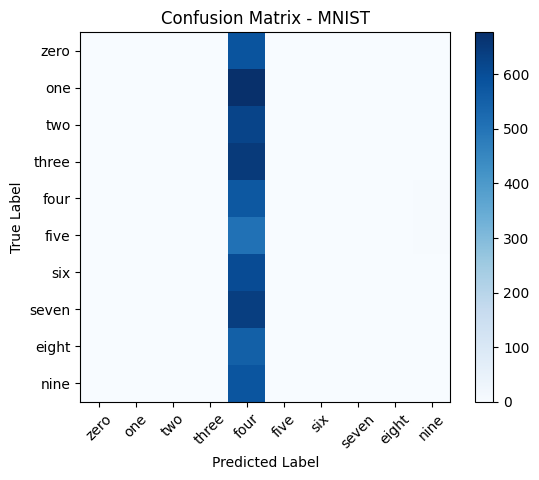

Precision - MNIST: 0.7095572263993317
Recall - MNIST: 0.09913344887348353
F1 score for MNIST: 0.017433709234989332


In [28]:
# Print confusion matrix and classification report for testing samples
def print_confusion_matrix_and_metrics(model, x_test, y_test, dataset_name):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

   # Print precision with zero_division parameter set
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1.0)
    print(f"Precision - {dataset_name}: {precision}")

    # Print recall
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall - {dataset_name}: {recall}")
    # print f1 score
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"F1 score for {dataset_name}: {f1}")

print_confusion_matrix_and_metrics(mnist_model, mnist_x_test, mnist_y_test, "MNIST")

157/157 [==============================] - 2s 15ms/step


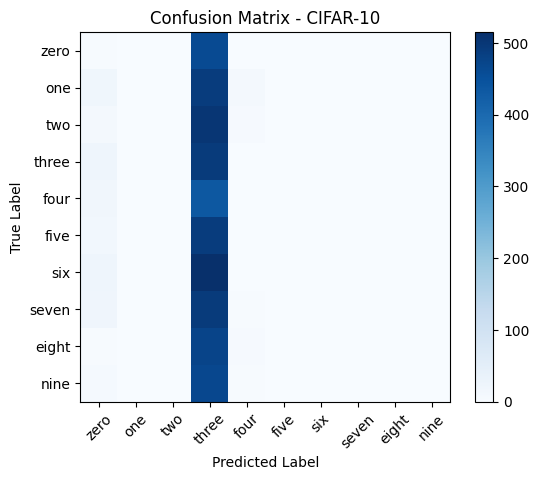

Precision - CIFAR-10: 0.5156961663169941
Recall - CIFAR-10: 0.09623318807818258
F1 score for CIFAR-10: 0.020132948066368166


In [27]:
print_confusion_matrix_and_metrics(cifar10_model, cifar10_x_test, cifar10_y_test, "CIFAR-10")